In [1]:
import cobra
import numpy as np
import pandas as pd
from cobra.flux_analysis import flux_variability_analysis
from cobra.util.solver import linear_reaction_coefficients

from full_ecosystem import Ecosystem
from eco_utils import *
from cobra import Metabolite, Reaction, Model
from cobra.util.array import create_stoichiometric_matrix
from cobra.util.solver import linear_reaction_coefficients
from cobra.flux_analysis import flux_variability_analysis


# _E. coli_ model load

In [2]:
data_dir = ''
model = cobra.io.read_sbml_model("%s%s" % (data_dir, "iAF1260.xml"))

Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07


In [3]:
model.reactions.BIOMASS_Ec_iAF1260_core_59p81M.reaction

'0.000223 10fthf_c + 0.000223 2ohph_c + 0.5137 ala__L_c + 0.000223 amet_c + 0.2958 arg__L_c + 0.2411 asn__L_c + 0.2411 asp__L_c + 59.984 atp_c + 0.004737 ca2_c + 0.004737 cl_c + 0.000576 coa_c + 0.003158 cobalt2_c + 0.1335 ctp_c + 0.003158 cu2_c + 0.09158 cys__L_c + 0.02617 datp_c + 0.02702 dctp_c + 0.02702 dgtp_c + 0.02617 dttp_c + 0.000223 fad_c + 0.007106 fe2_c + 0.007106 fe3_c + 0.2632 gln__L_c + 0.2632 glu__L_c + 0.6126 gly_c + 0.2151 gtp_c + 54.462 h2o_c + 0.09474 his__L_c + 0.2905 ile__L_c + 0.1776 k_c + 0.01945 kdo2lipid4_e + 0.4505 leu__L_c + 0.3432 lys__L_c + 0.1537 met__L_c + 0.007895 mg2_c + 0.000223 mlthf_c + 0.003158 mn2_c + 0.003158 mobd_c + 0.01389 murein5px4p_p + 0.001831 nad_c + 0.000447 nadp_c + 0.011843 nh4_c + 0.02233 pe160_c + 0.04148 pe160_p + 0.02632 pe161_c + 0.04889 pe161_p + 0.1759 phe__L_c + 0.000223 pheme_c + 0.2211 pro__L_c + 0.000223 pydx5p_c + 0.000223 ribflv_c + 0.2158 ser__L_c + 0.000223 sheme_c + 0.003948 so4_c + 0.000223 thf_c + 0.000223 thmpp_c + 0.

# Construction of auxotrophic _E. coli_ models for 2 member community

In [4]:
exports = ['EX_leu__L_e','EX_lys__L_e'] 

## Modelos

### **ec_minus_lys**: 

_E. coli_ which requires to have lysine supplemented in media or by other member of the community

In [5]:
ec_minus_lys = model.copy()

Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmp1nw2bdu8.lp
Reading time = 0.02 seconds
: 1668 rows, 4764 columns, 18462 nonzeros


In [6]:
ec_minus_lys.reactions.get_by_id('DAPDC')

Reaction identifier,DAPDC
Name,Diaminopimelate decarboxylase
Memory address,0x7fb7a7c3f9d0
Stoichiometry,"26dap__M_c + h_c --> co2_c + lys__L_c Meso-2,6-Diaminoheptanedioate + H+ --> CO2 CO2 + L-Lysine"
GPR,b2838
Lower bound,0.0
Upper bound,999999.0


In [7]:
ec_minus_lys_bound_modifications = {'DAPDC':(0,0),
                            'EX_lys__L_e' : (-1000,1000),
                                   } 
for rid in ec_minus_lys_bound_modifications:
    r = ec_minus_lys.reactions.get_by_id(rid)
    r.bounds = ec_minus_lys_bound_modifications[rid]

Check lysine requirement

In [8]:
ec_minus_lys.slim_optimize()

0.7678945589305766

In [9]:
flux_variability_analysis(ec_minus_lys, exports, fraction_of_optimum=0.1)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmpjhfpphen.lp
Reading time = 0.02 seconds
: 1669 rows, 4765 columns, 18465 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmp9rdc8fq9.lp
Reading time = 0.02 seconds
: 1669 rows, 4765 columns, 18465 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmpp23jfnlk.lp
Reading time = 0.05 seconds
: 1669 rows, 4765 columns, 18465 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmps3l0qrng.lp
Reading time = 0.02 seconds
: 1669 rows, 4765 

,minimum,maximum
EX_leu__L_e,0.0,5.461462
EX_lys__L_e,-1000.0,-0.026354


### **ec_minus_leu**:


_E. coli_ requires Leucine due to knockout on IPPS (2-isopropylmalate synthase) reaction

In [10]:
ec_minus_leu = model.copy()

Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmpkemrh4ra.lp
Reading time = 0.02 seconds
: 1668 rows, 4764 columns, 18462 nonzeros


In [11]:
ec_minus_leu.reactions.get_by_id('IPPS')

Reaction identifier,IPPS
Name,2-isopropylmalate synthase
Memory address,0x7fb7aa5c1dc0
Stoichiometry,3mob_c + accoa_c + h2o_c --> 3c3hmp_c + coa_c + h_c 3-Methyl-2-oxobutanoate + Acetyl-CoA + H2O H2O --> 3-Carboxy-3-hydroxy-4-methylpentanoate + Coenzyme A + H+
GPR,b0074
Lower bound,0.0
Upper bound,999999.0


In [12]:
ec_minus_leu_bound_modifications = {'IPPS':(0,0),
                            'EX_leu__L_e' : (-1000,1000),
                                   } 
for rid in ec_minus_leu_bound_modifications:
    r = ec_minus_leu.reactions.get_by_id(rid)
    r.bounds = ec_minus_leu_bound_modifications[rid]

Check leucine requirement

In [13]:
ec_minus_leu.slim_optimize()

0.7763435343183095

In [14]:
flux_variability_analysis(ec_minus_leu, exports, fraction_of_optimum=0.1)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmp60c98p3b.lp
Reading time = 0.03 seconds
: 1669 rows, 4765 columns, 18465 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmpcdt49ifb.lp
Reading time = 0.02 seconds
: 1669 rows, 4765 columns, 18465 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmpuiqel_j4.lp
Reading time = 0.02 seconds
: 1669 rows, 4765 columns, 18465 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmpp83l3j35.lp
Reading time = 0.02 seconds
: 1669 rows, 4765 

,minimum,maximum
EX_leu__L_e,-0.349743,-0.034974
EX_lys__L_e,0.000000,5.492299


## Store individual models and generate ecosystem object

In [15]:
member_models = { 'ec_minus_lys':ec_minus_lys,
                  'ec_minus_leu':ec_minus_leu         
                 }

for model_id in member_models:
    filename = "%s.xml" % (model_id)
    member_model = member_models[model_id]
    cobra.io.write_sbml_model(member_model, filename)
    print('model %s stored' % model_id)

model ec_minus_lys stored
model ec_minus_leu stored


In [16]:
member_models = [ec_minus_lys, ec_minus_leu]

In [17]:
eco2 = Ecosystem(models = member_models, prefixes=['eco_lys', 'eco_leu'], 
                     community_name = 'eco2', community_id = 'eco2', solver='gurobi')

0. Copying member models ...
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmpran993mw.lp
Reading time = 0.02 seconds
: 1668 rows, 4764 columns, 18462 nonzeros
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmpb4vqw2w8.lp
Reading time = 0.02 seconds
: 1668 rows, 4764 columns, 18462 nonzeros
1. Storing exchanged metabolites information ...
2. Updating member model objects ids ...
3. Storing member objectives ...
4. Merging member models ...
{'eco_lys_BIOMASS_Ec_iAF1260_core_59p81M': 1.0}
{'eco_leu_BIOMASS_Ec_iAF1260_core_59p81M': 1.0}
5. Creating pool compartment, metabolites and reactions ...
6. Updating compartment names ...
Done. Community model created
Created community model from 2 member models:
General stats:
model (0):
	 id = iAF1260, name =  , prefix= eco_lys
		 reactions = 2382
		 exchange metabolites = 304
		 compartments = 3
model (1):
	 id = iAF1260, name =  , prefix= eco_leu
		 reactions = 2382
		 exchange 

### Set bounds simulation

From Zhang et al., (2014), uptake of single cultured strains (Table 1):
- dlysA: 0.161 mmol/gDW/h
- dleuA: 0.220 mmol/gDW/h

Table S1: glc uptake rate by the community: 6.025 mmol/gDW/h.

Scenarios defined in this work:
- sim_glc_cons_AA_prod_no_AA: constrained glucose entry (-10), as well as biological constraint of 10. No leucine or lysine supplementation
- sim_glc_cons_AA_prod_001_AA: same conditions of previous scenario but supplementation of 0.01 of leucine and lysine

In [23]:
case = 'sim_glc_cons_AA_prod_no_AA'
eco2.set_pool_bounds({'glc__D_e':(-10,1000)}, bioCons = -10)
eco2.set_pool_bounds({'lys__L_e':(0,1000)}, bioCons = -0.161)
eco2.set_pool_bounds({'leu__L_e':(0,1000)}, bioCons = -0.22)
eco2.set_pool_bounds({'o2_e':(-15,1000)}, bioCons = -15)

eco2.cmodel.reactions.eco_leu_EX_lys__L_e.upper_bound = 0.2
eco2.cmodel.reactions.eco_lys_EX_leu__L_e.upper_bound = 0.2

In [18]:
eco2.cmodel.optimize()

,fluxes,reduced_costs
eco_lys_ACGAM1PPpp,0.000000,0.00000
eco_lys_2AGPA140tipp,0.000000,0.00000
eco_lys_EX_acser_e,0.000000,-0.15265
eco_lys_2AGPA141tipp,0.000000,0.00000
eco_lys_2AGPA160tipp,0.000000,0.00000
...,...,...
EX_lys__L_e,-7.052618,0.00000
EX_lyx__L_e,0.000000,0.00000
EX_mal__D_e,0.000000,0.00000
EX_mal__L_e,0.000000,0.00000


In [19]:
eco2.cmodel.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
ca2_e_pool,EX_ca2_e,0.007315,0,0.00%
cl_e_pool,EX_cl_e,0.007315,0,0.00%
cobalt2_e_pool,EX_cobalt2_e,0.004877,0,0.00%
cu2_e_pool,EX_cu2_e,0.004877,0,0.00%
fe2_e_pool,EX_fe2_e,0.02264,0,0.00%
glc__D_e_pool,EX_glc__D_e,16,6,96.31%
k_e_pool,EX_k_e,0.2743,0,0.00%
leu__L_e_pool,EX_leu__L_e,0.3497,6,2.11%
lys__L_e_pool,EX_lys__L_e,0.2635,6,1.59%
mg2_e_pool,EX_mg2_e,0.01219,0,0.00%


In [20]:
eco2.set_cluster_reactions()

Missing FCA results
Using non-blocked reactions only
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmpn4z7i8c4.lp
Reading time = 0.04 seconds
: 3641 rows, 10137 columns, 38753 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmpkecd2i8e.lp
Reading time = 0.07 seconds
: 3641 rows, 10137 columns, 38753 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmp2mx398hp.lp
Reading time = 0.07 seconds
: 3641 rows, 10137 columns, 38753 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmpfu

### Compute grid

In [21]:
eco2.build_grid(numPoints = 50, expand = True, drop_zero=True, ignore_maint = True)

TypeError: build_grid() got an unexpected keyword argument 'ignore_maint'

In [ ]:
eco2.get_member_reactions()
eco2.get_points_distribution()

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})

eco2.plot_2D_slice(prefixes=[], fixed_values=[], parent_cmap='tab20',s=60, figsize=(11,12), 
                         to_plot = None, show_edge=False,frac_prefix= None,
                            xlabel = '$f_{org1}$',
                            ylabel ='$\mu_{com}[h^{-1}]$', saveFile = 'grid')

In [58]:
eco2.analyze_grid()

[0.11111111 0.        ]
updating reaction bounds ...
[0.22222222 0.        ]
updating reaction bounds ...
[0.33333333 0.        ]
updating reaction bounds ...
[0.44444444 0.        ]
updating reaction bounds ...
[0.55555556 0.        ]
updating reaction bounds ...
[0.66666667 0.        ]
updating reaction bounds ...
[0.77777778 0.        ]
updating reaction bounds ...
[0.88888889 0.        ]
updating reaction bounds ...
[1. 0.]
updating reaction bounds ...
[0.        0.0521238]
updating reaction bounds ...
unfeasible point
[0.11111111 0.0521238 ]
updating reaction bounds ...
[0.22222222 0.0521238 ]
updating reaction bounds ...
[0.33333333 0.0521238 ]
updating reaction bounds ...
[0.44444444 0.0521238 ]
updating reaction bounds ...
[0.55555556 0.0521238 ]
updating reaction bounds ...
[0.66666667 0.0521238 ]
updating reaction bounds ...
[0.77777778 0.0521238 ]
updating reaction bounds ...
[0.88888889 0.0521238 ]
updating reaction bounds ...
[1.        0.0521238]
updating reaction bounds 

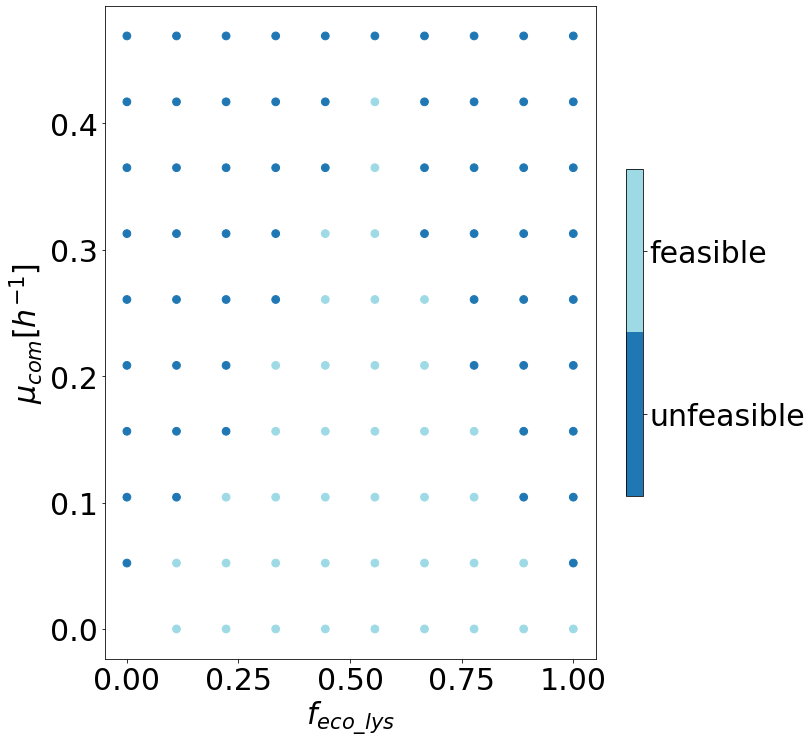

In [60]:
eco2.plot_2D_slice(prefixes=[], fixed_values=[], parent_cmap='tab20',s=60, figsize=(11,12), 
                         to_plot = 'feasible', show_edge=False,frac_prefix= None,
                            xlabel = '$f_{eco\_lys}$',
                            ylabel ='$\mu_{com}[h^{-1}]$', saveFile = 'grid')#, fractions=[0.6,0.4],  )

In [ ]:
store_miniEco_inputs(eco2, '.', case,'eco2_2023')

In [ ]:
eco2.objectives

In [ ]:
case

# Functional relationship analysis

In [30]:
def fraction_to_normalize(point_fractions, reaction):
    #from point_fraction computes which element of this array should be used for normalization
    #reaction: string reaction id
    if reaction.startswith('org1_'):
        fraction = point_fractions[0]
    elif reaction.startswith('org2_'):
        fraction = point_fractions[1]
    else: 
        print('No org detected, asumming community reaction')
        fraction =1
        
    return(fraction)
    


In [35]:
grid_x = [0.2, 0.4, 0.6, 0.8]
grid_y = reversed([0.1, 0.2, 0.4])
feasible_points = eco2.points[eco2.feasible_points]
analyze_points = []
for y in grid_y:
    for x in grid_x:
        search_point = [x, y]
        print(search_point)
        distances = np.linalg.norm(feasible_points-search_point, axis=1)
        print(distances)
        min_index = np.argmin(distances)
        print(min_index)
        analyze_points.append(min_index)
        print(f"the closest point to {search_point} is {feasible_points[min_index]}, at a distance of {distances[min_index]}")
        
        
        
        

[0.2, 0.4]
[[21.01896131 10.76973696]]
1


IndexError: index 1 is out of bounds for axis 0 with size 1

In [37]:
eco2.feasible_points

In [ ]:
import copy

#select point (I'm going to do it relative to the clusters as before)
#this_point = total_points[3] #relative to cluster
rxns_analysis = ['eco_lys_EX_leu__L_e', 'eco_leu_EX_leu__L_e']
print(rxns_analysis)


maxmin_data = []
for this_point in analyze_points:
    model = copy.deepcopy(eco2)
    feasible_points = model.points[model.feasible_points]
    this_point_coords = feasible_points[this_point]
    print('Selected point'+str(this_point_coords))
    print('This point coords '+str(this_point_coords))
    this_point_frac = [this_point_coords[0], 1-this_point_coords[0]]
    print('This point frac '+str(this_point_frac))
    point = [this_point_coords[0]*this_point_coords[1], (1-this_point_coords[0])*this_point_coords[1]] #equivalent to old grid
    print('Old grid point '+str(point))

    #update bounds
    for i, member in enumerate(model.prefixes):
        mfrac = this_point_frac[i]
        mrxns = model.member_rxns[member]

        for rid in mrxns:
            r = model.cmodel.reactions.get_by_id(rid)
            old_bounds = r.bounds
            r.bounds = (old_bounds[0]*mfrac, old_bounds[1]*mfrac)

    for ix, member_objectives in enumerate(model.objectives):
        new_bounds = (point[ix], point[ix])

        for rid in member_objectives.keys():
            rxn = model.cmodel.reactions.get_by_id(rid)
            rxn.bounds = new_bounds

    try:
        #define limits reactions based on theoretical max-min defined from model
        rxn_ref_fva = flux_variability_analysis(model.cmodel, reaction_list = rxns_analysis[0])

        #define range reactions
        values_rxn_ref = np.linspace(rxn_ref_fva['minimum'][0], rxn_ref_fva['maximum'][0], num=50)
        values_rmax = []
        values_rmin = []

        with model.cmodel as cmodel:
            for val in values_rxn_ref:
                rxn = cmodel.reactions.get_by_id(rxns_analysis[0])
                rxn.bounds = (val,val)
                #compute max min
                fva = flux_variability_analysis(cmodel, reaction_list = rxns_analysis[1])
                for i, el in enumerate(fva):
                    row_dict = dict()
                    row_dict[rxns_analysis[0]] = val/fraction_to_normalize(this_point_frac, rxns_analysis[0])
                    row_dict[rxns_analysis[1]] = fva[el][0]/fraction_to_normalize(this_point_frac, rxns_analysis[1])
                    row_dict['FVA'] = el
                    row_dict['point'] = str([round(this_point_coords[0],3), round(this_point_coords[1],3)])
                    maxmin_data.append(row_dict)
                #store values 
                #values_rmax.append(fva['maximum'][0])
                #values_rmin.append(fva['minimum'][0])

    except:
        print('\n Issues with '+str(this_point_coords)+' unfeasible?')

    #divide by f_i
    #if rxns_analysis[1].startswith('wen'):
    #    values_rmax = values_rmax/this_point_frac[0]
    #    values_rmin = values_rmin/this_point_frac[0]
    #    values_rxn_ref = values_rxn_ref/this_point_frac[0]
    #elif rxns_analysis[1].startswith('cut'):
    #    values_rxn_ref = values_rxn_ref/this_point_frac[1]
    #    values_rmax = values_rmax/this_point_frac[1]
    #    values_rmin = values_rmin/this_point_frac[1]


